In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image, ImageEnhance, ImageOps
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2



In [5]:
# مسیر به دیتاست
data_dir = r"C:\Users\omid\OneDrive\Desktop\data"


In [6]:
# بررسی تعداد تصاویر در هر کلاس
def count_images(folder):
    class_counts = {}
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [7]:
train_counts = count_images(os.path.join(data_dir, 'train'))
test_counts = count_images(os.path.join(data_dir, 'test'))

In [8]:
test_counts

{'COVID19': 116, 'NORMAL': 317, 'PNEUMONIA': 855}

In [9]:

train_counts

{'COVID19': 460, 'NORMAL': 1266, 'PNEUMONIA': 3418}

In [ ]:
formats = set()

for root, dirs, files in os.walk(data_dir):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        formats.add(ext)

print("File formats available in the dataset:", formats)

فرمت‌های فایل‌های موجود در دیتاست: {'.jpg'}


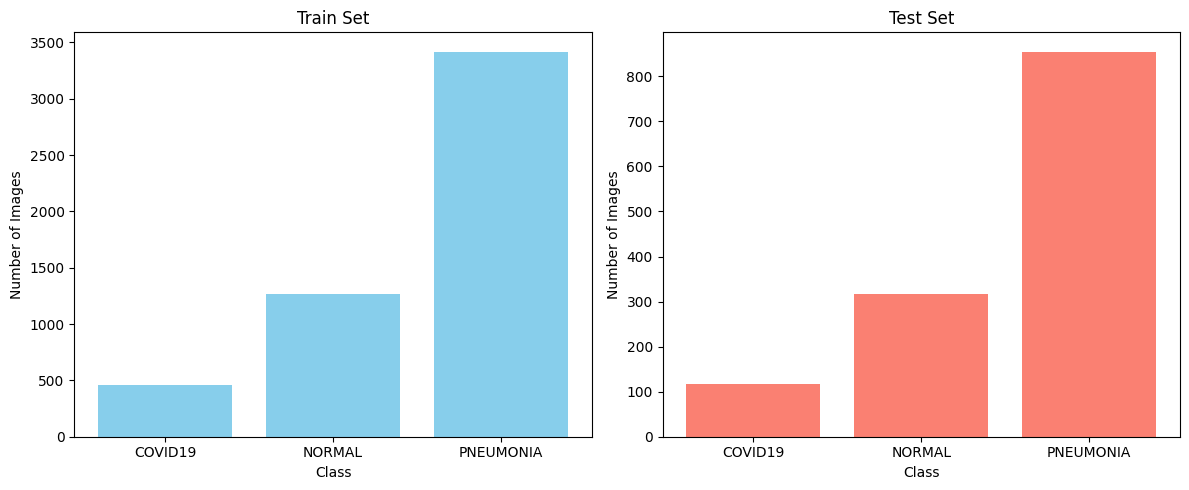

In [8]:
# رسم هیستوگرام
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(train_counts.keys(), train_counts.values(), color='skyblue')
axes[0].set_title("Train Set")
axes[1].bar(test_counts.keys(), test_counts.values(), color='salmon')
axes[1].set_title("Test Set")
for ax in axes:
    ax.set_ylabel("Number of Images")
    ax.set_xlabel("Class")
plt.tight_layout()
plt.show()


In [10]:
# تعیین کمترین تعداد نمونه در کلاس‌ها
min_count_train = min(train_counts.values())
min_count_train

460

In [11]:
# تعیین کمترین تعداد نمونه در کلاس‌ها
min_count_test = min(test_counts.values())
min_count_test

116

In [12]:
# مرحله: متعادل‌سازی داده‌های تست
balanced_images_test = []
balanced_labels_test = []

# ابتدا دیکشنری از کلاس‌ها به مسیر تصاویر ایجاد می‌کنیم
class_to_images = {}

for class_name in os.listdir(r"C:\Users\omid\OneDrive\Desktop\data\test"):
    class_path = os.path.join(r"C:\Users\omid\OneDrive\Desktop\data\test", class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        image_paths = [os.path.join(class_path, img) for img in images]
        class_to_images[class_name] = image_paths

# انتخاب تصادفی min_count_test تصویر از هر کلاس
for class_name, image_list in class_to_images.items():
    selected_imgs = random.sample(image_list, min_count_test)
    for img_path in selected_imgs:
        try:
            img = Image.open(img_path).convert('RGB')  # تبدیل به RGB برای سازگاری
            img = img.resize((150, 150))  # در صورت نیاز به تغییر سایز
            balanced_images_test.append(np.array(img))
            balanced_labels_test.append(class_name)
        except Exception as e:
            print(f"خطا در بارگذاری تصویر {img_path}: {e}")

# تبدیل لیست‌ها به numpy array
#balanced_images_test = np.array(balanced_images_test)
#balanced_labels_test = np.array(balanced_labels_test)



In [13]:
len(balanced_images)

348

In [14]:
len(balanced_labels)

348

In [12]:
class_distribution = Counter(balanced_labels)
print("تعداد نمونه‌ها از هر کلاس در balanced_images:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")


تعداد نمونه‌ها از هر کلاس در balanced_images:
COVID19: 116
NORMAL: 116
PNEUMONIA: 116


In [13]:
# مرحله: متعادل‌سازی داده‌های تست
balanced_images_train = []
balanced_labels_train = []

# ابتدا دیکشنری از کلاس‌ها به مسیر تصاویر ایجاد می‌کنیم
class_to_images = {}

for class_name in os.listdir(r"C:\Users\omid\OneDrive\Desktop\data\train"):
    class_path = os.path.join(r"C:\Users\omid\OneDrive\Desktop\data\train", class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        image_paths = [os.path.join(class_path, img) for img in images]
        class_to_images[class_name] = image_paths

# انتخاب تصادفی min_count_test تصویر از هر کلاس
for class_name, image_list in class_to_images.items():
    selected_imgs = random.sample(image_list, min_count_train)
    for img_path in selected_imgs:
        try:
            img = Image.open(img_path).convert('RGB')  # تبدیل به RGB برای سازگاری
            img = img.resize((150, 150))  # در صورت نیاز به تغییر سایز
            balanced_images_train.append(np.array(img))
            balanced_labels_train.append(class_name)
        except Exception as e:
            print(f"خطا در بارگذاری تصویر {img_path}: {e}")

# تبدیل لیست‌ها به numpy array
#balanced_images = np.array(balanced_images_train)
#balanced_labels = np.array(balanced_labels_train)



In [15]:
class_distribution2 = Counter(balanced_labels_train)
print("تعداد نمونه‌ها از هر کلاس در balanced_images:")
for class_name, count in class_distribution2.items():
    print(f"{class_name}: {count}")


تعداد نمونه‌ها از هر کلاس در balanced_images:
COVID19: 460
NORMAL: 460
PNEUMONIA: 460


In [16]:
# تعریف روش‌های افزایش داده
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [17]:
# تعداد افزایشی که می‌خواهیم (مثلاً 5 برابر، چون داده اصلی هم داریم میشه 6 برابر)
augment_factor = 4

augmented_images_train = []
augmented_labels_train = []

for img, label in zip(balanced_images_train, balanced_labels_train):
    img = np.expand_dims(img, 0)  # تغییر شکل برای ورودی دیتاجن
    aug_iter = datagen.flow(img, batch_size=1)
    
    for _ in range(augment_factor):
        aug_img = next(aug_iter)[0]
        augmented_images_train.append(aug_img)
        augmented_labels_train.append(label)

# اضافه کردن تصاویر اصلی هم به مجموعه نهایی
augmented_images_train.extend(balanced_images_train)
augmented_labels_train.extend(balanced_labels_train)


In [18]:
# تعداد افزایشی که می‌خواهیم (مثلاً 5 برابر، چون داده اصلی هم داریم میشه 6 برابر)
augment_factor = 4

augmented_images_test = []
augmented_labels_test = []

for img, label in zip(balanced_images_test, balanced_labels_test):
    img = np.expand_dims(img, 0)  # تغییر شکل برای ورودی دیتاجن
    aug_iter = datagen.flow(img, batch_size=1)
    
    for _ in range(augment_factor):
        aug_img = next(aug_iter)[0]
        augmented_images_test.append(aug_img)
        augmented_labels_test.append(label)

# اضافه کردن تصاویر اصلی هم به مجموعه نهایی
augmented_images_test.extend(balanced_images_test)
augmented_labels_test.extend(balanced_labels_test)


In [19]:
def cnn_model(input_shape=(150, 150, 3)):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Block 4
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Block 5
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Block 6
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    model.add(Dense(256))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    model.add(Dense(3))
    model.add(Activation('softmax'))

    return model



In [20]:
# ساخت مدل
model =cnn_model()


C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:

# تبدیل لیست‌ها به آرایه‌های NumPy
X = np.array(augmented_images_train)
y = np.array(augmented_labels_train)



In [24]:
# نرمال‌سازی تصاویر
X = X / 255.0


In [23]:
# تقسیم داده‌ها به داده‌های آموزش و اعتبارسنجی (۳۵٪ برای validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=42, stratify=y)


In [24]:
# Encode string labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)



In [25]:
y_train_encoded = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)
y_val_encoded = tf.keras.utils.to_categorical(y_val_encoded, num_classes=3)


In [54]:

# آموزش مدل
history = model.fit(
    X_train, y_train_encoded,
    epochs=15,  # یا بیشتر مثل 50 یا 100 در صورت نیاز
    batch_size=32,
    validation_data=(X_val, y_val_encoded),
    shuffle=True
)


Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9465 - loss: 0.1441 - val_accuracy: 0.8497 - val_loss: 0.3823
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9592 - loss: 0.1254 - val_accuracy: 0.9188 - val_loss: 0.2092
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9613 - loss: 0.1111 - val_accuracy: 0.8128 - val_loss: 0.5006
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.9407 - loss: 0.1621 - val_accuracy: 0.8286 - val_loss: 0.5355
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9534 - loss: 0.1300 - val_accuracy: 0.8940 - val_loss: 0.2676
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.9659 - loss: 0.0938 - val_accuracy: 0.8153 - val_loss: 0.5211
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9684 - loss: 0.0862 - val_accuracy: 0.9433 - val_loss: 0.1821
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9775 - loss: 0.0588 - val_accu

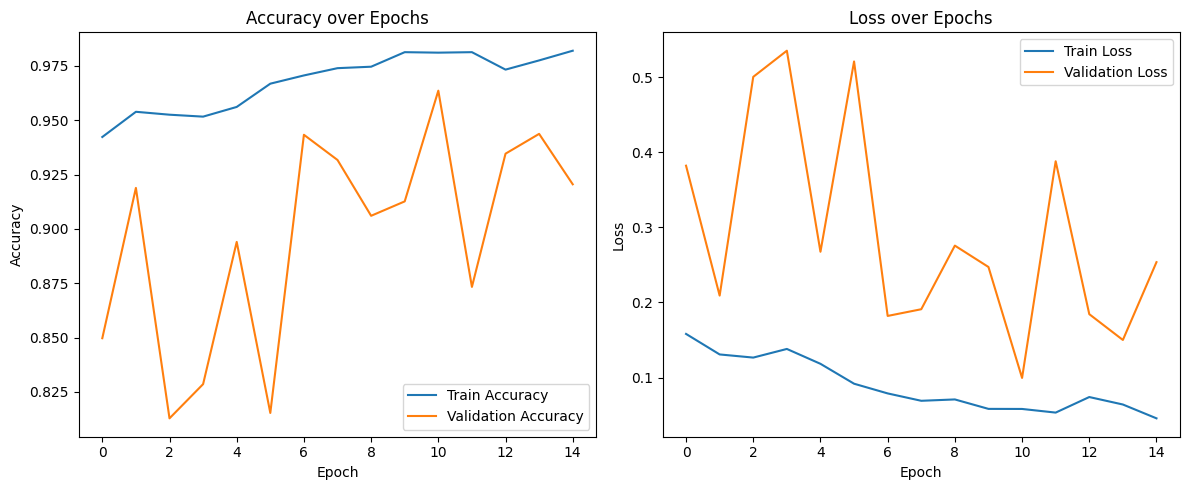

In [55]:

# رسم دقت
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# رسم خطا (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
from tensorflow.keras.utils import to_categorical


In [59]:
# Encode string labels into numerical values
y_test_encoded = label_encoder.transform(balanced_labels_test)

# Convert encoded labels to categorical format
y_test_balanced = to_categorical(y_test_encoded, num_classes=3)

# Convert images to numpy array
X_test_balanced = np.array(balanced_images_test)


In [60]:
test_loss, test_acc = model.evaluate(X_test_balanced, y_test_balanced)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.9455 - loss: 0.1889
Test Accuracy: 92.24%
Test Loss: 0.2600


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.argmax(y_test_balanced, axis=1)
y_pred = np.argmax(model_vgg.predict(X_test_balanced), axis=1)

print(classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [29]:
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# فریز کردن لایه‌های پایه
for layer in base_model_vgg.layers:
    layer.trainable = False

# اضافه کردن لایه‌های جدید
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)



In [30]:
model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions)

model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



In [31]:
# آموزش مدل
history_vgg = model_vgg.fit(X_train, y_train_encoded, epochs=15, batch_size=32,
                            validation_data=(X_val, y_val_encoded), shuffle=True)


Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.4357 - loss: 4.9367 - val_accuracy: 0.7843 - val_loss: 0.7180
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.7051 - loss: 1.4837 - val_accuracy: 0.8439 - val_loss: 0.4937
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 516s 4s/step - accuracy: 0.7827 - loss: 0.8340 - val_accuracy: 0.8621 - val_loss: 0.4037
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 843s 6s/step - accuracy: 0.8069 - loss: 0.7091 - val_accuracy: 0.8791 - val_loss: 0.3409
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 851s 6s/step - accuracy: 0.8333 - loss: 0.5162 - val_accuracy: 0.8841 - val_loss: 0.3095
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 701s 5s/step - accuracy: 0.8384 - loss: 0.4640 - val_accuracy: 0.8932 - val_loss: 0.2927
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 736s 5s/step - accuracy: 0.8537 - loss: 0.4227 - val_accuracy: 0.9006 - val_loss: 0.2623
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 533s 4s/step - accuracy: 0.8720 - loss: 0.3385 - val_accu

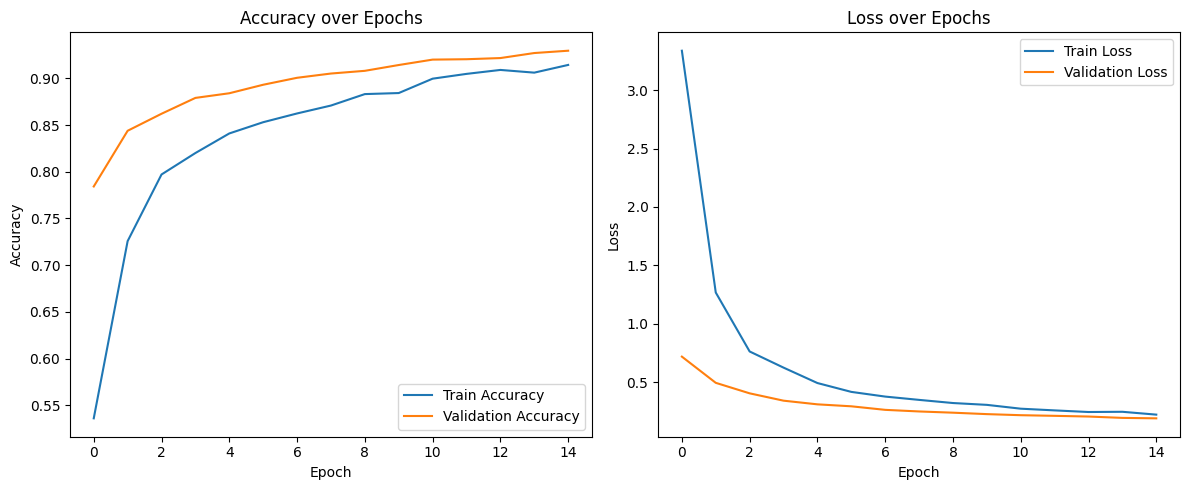

In [32]:

# رسم دقت
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# رسم خطا (Loss)
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# ارزیابی مدل روی داده‌های تست
test_loss, test_acc = model_vgg.evaluate(X_val, y_val_encoded)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


76/76 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.9445 - loss: 0.1535
Test Accuracy: 92.96%
Test Loss: 0.1896


In [47]:
y_true = np.argmax(y_val_encoded, axis=1)
y_pred = np.argmax(model_vgg.predict(X_val), axis=1)


76/76 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step


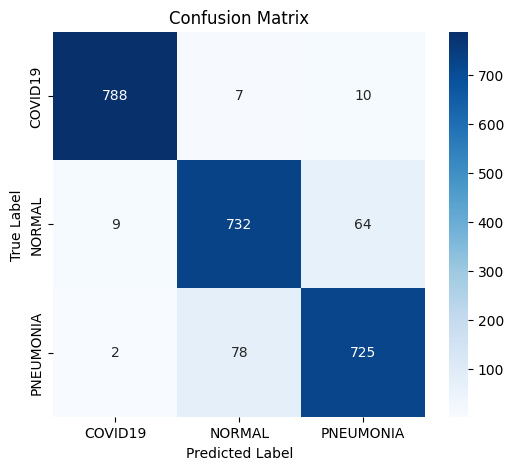

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [39]:
base_model_mobile = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

C:\Users\omid\AppData\Local\Temp\ipykernel_3108\1056245359.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobile = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [40]:
# فریز کردن لایه‌های پایه
for layer in base_model_mobile.layers:
    layer.trainable = False

# اضافه کردن لایه‌های جدید
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

In [41]:
model_mobile = Model(inputs=base_model_mobile.input, outputs=predictions)

In [42]:
model_mobile.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [44]:
# آموزش مدل
history_mobile = model_mobile.fit(X_train, y_train_encoded, epochs=10, batch_size=32,
                                  validation_data=(X_val, y_val_encoded), shuffle=True)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 68s 451ms/step - accuracy: 0.5097 - loss: 1.1127 - val_accuracy: 0.7810 - val_loss: 0.6058
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 58s 411ms/step - accuracy: 0.7469 - loss: 0.6329 - val_accuracy: 0.8215 - val_loss: 0.5082
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 85s 602ms/step - accuracy: 0.8044 - loss: 0.5222 - val_accuracy: 0.8398 - val_loss: 0.4534
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 564ms/step - accuracy: 0.8193 - loss: 0.4915 - val_accuracy: 0.8398 - val_loss: 0.4387
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 572ms/step - accuracy: 0.8493 - loss: 0.4271 - val_accuracy: 0.8530 - val_loss: 0.4053
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 65s 450ms/step - accuracy: 0.8596 - loss: 0.3997 - val_accuracy: 0.8555 - val_loss: 0.3857
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 571ms/step - accuracy: 0.8664 - loss: 0.3803 - val_accuracy: 0.8634 - val_loss: 0.3631
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 76s 544ms/step - accuracy: 0.8559 - loss: 0

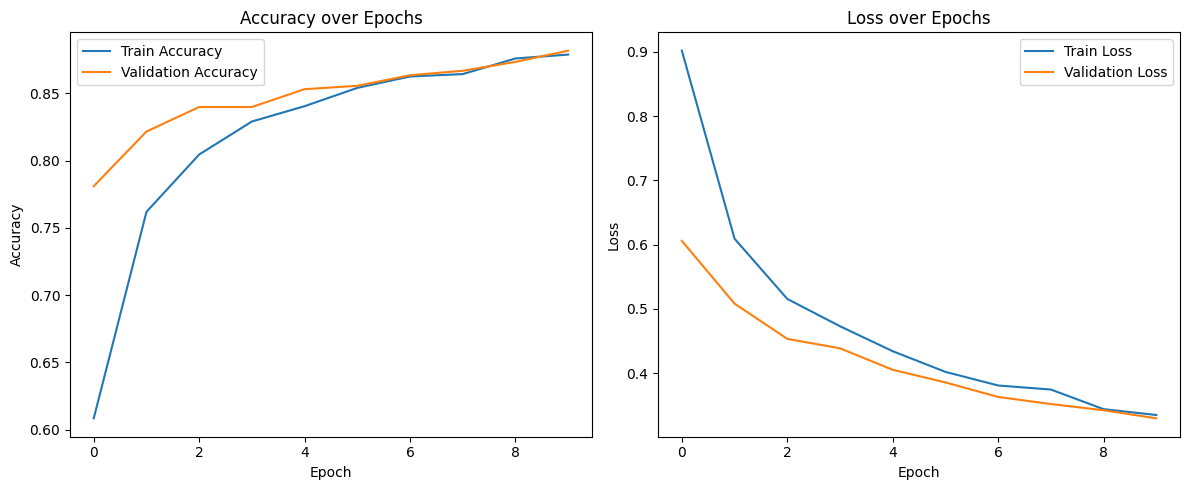

In [45]:

# رسم دقت
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# رسم خطا (Loss)
plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
# ارزیابی مدل روی داده‌های تست
test_loss_model, test_acc_model = model_mobile.evaluate(X_val, y_val_encoded)
print(f"Test Accuracy: {test_acc_model * 100:.2f}%")
print(f"Test Loss: {test_loss_model:.4f}")


76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.8823 - loss: 0.3268
Test Accuracy: 88.16%
Test Loss: 0.3298


In [50]:
y_pred_mobile = np.argmax(model_mobile.predict(X_val), axis=1)


76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step


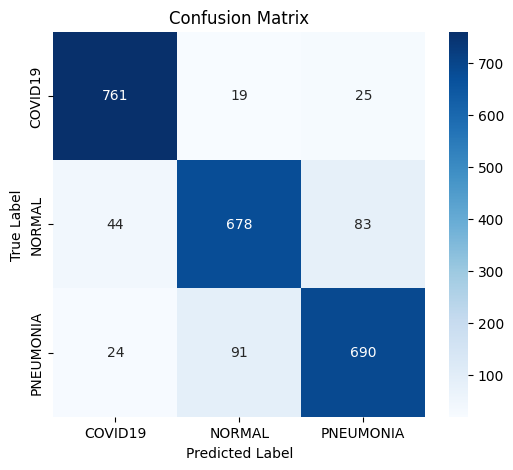

In [51]:
conf_matrix_mobile = confusion_matrix(y_true, y_pred_mobile)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_mobile, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
